## Create Lagrange Basis Polynomial Functionality

In [43]:
using Plots
pyplot()
default(guidefont = font(17), tickfont = font(15), legendfont = font(12), titlefont = font(20))


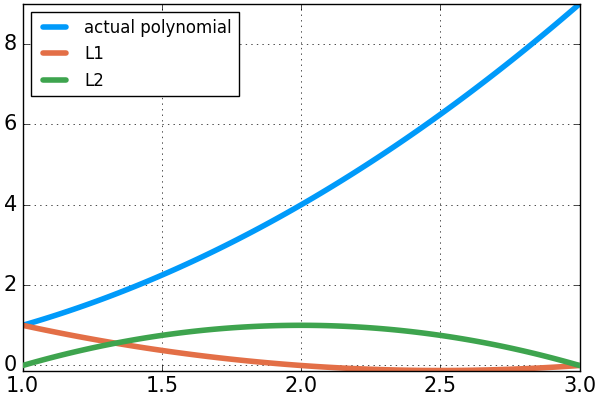

In [120]:

"""
L = lagrange_basis_poly{T<:Number}(x::Float64,x_data::AbstractArray{T},idx::Int64,N::Int64)
--------------------------------------------------------------------\n
Author: Huckleberry Febbo, Graduate Student, University of Michigan
Date Create: 12/26/2016, Last Modified: 12/26/2016
--------------------------------------------------------------------\n
# Input Arguments
* `x::Float64`: point to approximate function value at
* `x_data::Array{Float64}`: x data to used calculate basis polynomials
* `N::Int64`: order of Lagrange interpolating polynomial

# Output Arguments
* `L::Array{Float64}`: Lagrange basis polynomials

A basic description of Lagrange interpolating polynomials is provided [here](http://127.0.0.1:8000/lagrange_poly.html#lagrange-poly)

"""
function lagrange_basis_poly{T<:Number}(x::Float64,x_data::AbstractArray{T},idx::Int64,N::Int64)
    L = 1;
    for j in 1:N+1 # use all of the data
      if j!=idx
        L = L*(x - x_data[j])/(x_data[idx]-x_data[j]);
      end
    end
  return L
end

# example, interpolate f(x) = x^2 over 1<=x<=3 given
x_data = [1,2,3];
y_data = [1,4,9];
x0 = 1; xf = 3;
ns = 100;  # plotting points
x = Array(linspace(x0,xf,ns));
y = x.^2;
plot(x,y, label= "actual polynomial",w=4)

N = length(x_data)-1; # order of Lagrange Polynomial
if N > length(x_data) -1
  error("Maximum N value = length(x_data)-1")
end
L = zeros(Float64,N+1,ns);
for idx in 1:N+1
  for j in 1:ns
    L[idx,j] = lagrange_basis_poly(x[j],x_data,idx,N)
  end
end
plot!(x,L[1,:],label="L1",w=4)
plot!(x,L[2,:],label="L2",w=4)

# Approximate Function Using Basis Polynomials


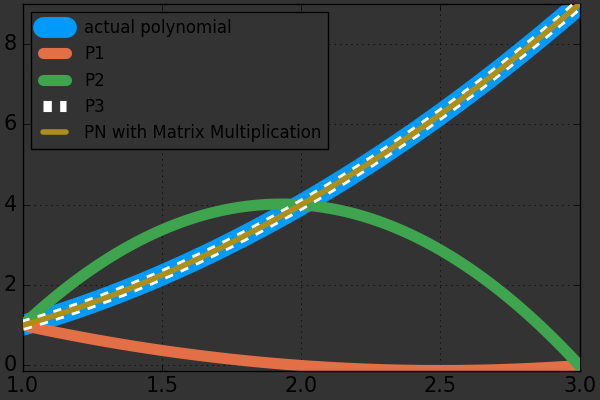

In [127]:
P = zeros(Float64,N+1,ns)
for idx in 1:N+1  
    if idx==1
        P[idx,:] = y_data[idx]*L[idx,:]
    else
        P[idx,:] = y_data[idx]*L[idx,:] + P[idx-1,:]
    end
end
P2=y_data'*L

plot(x,y,label= "actual polynomial",w=15)
plot!(x,P[1,:],w=8,label="P0")
plot!(x,P[2,:],w=8,label="P1")
plot!(x,P[3,:],line=(8,:dash,:white),label="P2")
plot!(x,P2',w=4,label="PN with Matrix Multiplication",background_color=RGB(0.2,0.2,0.2))

Notice how matrix multiplication directly gives the result.